# <center>Machine learning from scratch - Part I</center>
## <center>EMBO practical course on population genomics 2019 @ Procida, Italy</center>
### <center>Marco Chierici & Margherita Francescatto</center>
#### <center>_FBK/MPBA_</center>

In this handout we will go through basic concepts of machine learning using scikit-learn and the SEQC neuroblastoma data set [Zhang et al, _Genome Biology_, 2015].

In [1]:
exec(open("chierici_practical_part1.py").read())

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read CSV (comma-separated) file into DataFrame
    
    Also supports optionally itera

[0.08194369 0.0433671 ]


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

0.8602941176470589
0.8602941176470589
1.0
              precision    recall  f1-score   support

           0       1.00      0.59      0.74        46
           1       0.83      1.00      0.90        90

   micro avg       0.86      0.86      0.86       136
   macro avg       0.91      0.79      0.82       136
weighted avg       0.88      0.86      0.85       136

0.6961630553262051


In particular, we will focus on **a subset of 272 samples (136 training, 136 test)**, aiming at predicting an **extreme disease outcome** (favorable vs unfavorable samples: see main paper).

The data was preprocessed a bit to facilitate the progress of the tutorial.

Let's start by loading a few modules that we'll be using later:

In [2]:
import numpy as np
import pylab as plt ## for plotting
import pandas as pd ## for reading text files and manipulating data frames
from sklearn import neighbors ## kNN classifier
%matplotlib inline
np.random.seed(42) ## set random seed just in case

Define files to read:

In [3]:
##  for convenience, define the data directory as a variable
DATA_DIR = "NB_data/" #"/data/marco/" 

In [4]:
DATA_TR = DATA_DIR + "MAV-G_272_tr.txt"
DATA_TS = DATA_DIR + "MAV-G_272_ts.txt"
LABS_TR = DATA_DIR + "labels_tr.txt"
LABS_TS = DATA_DIR + "labels_ts.txt"

Note: there are more sophisticated ways to work with files and paths in Python. Here is one, in case you are curious:

In [5]:
## alternative way to define files & paths
## this should be preferred, since it is OS-independent
import os
DATA_TR = os.path.join(DATA_DIR, "MAV-G_272_tr.txt")
DATA_TS = os.path.join(DATA_DIR, "MAV-G_272_ts.txt")
LABS_TR = os.path.join(DATA_DIR, "labels_tr.txt")
LABS_TS = os.path.join(DATA_DIR, "labels_ts.txt")

Read the files in as _pandas dataframes_ (they are conceptually like R data frames):

In [6]:
data_tr = pd.read_csv(DATA_TR, sep = "\t")
data_ts = pd.read_csv(DATA_TS, sep = "\t")

The function `read_csv` has a lot more input arguments to deal with different situations.

If you want to know more about this or any other Python function, use the `help(function_name)` command:

In [ ]:
help(pd.read_csv)

Give a look at what we have here, start with getting the dimensions of what we just uploaded:

In [8]:
data_tr.shape

(136, 52230)

What's inside?

A peek at the first rows reveals that the first column (the dataframe index) contains the sample IDs, and the remaining columns are genes:

In [9]:
data_tr.head()

,sampleID,ALB.Gene_AceView,CD24L4.1.Gene_AceView,RPS11.Gene_RefSeq,RPS18.Gene_AceView,C5orf13.Gene_AceView,CCT2.Gene_AceView,COL1A1.Gene_AceView,DDX1.Gene_AceView,EEF1A1.Gene_AceView,...,zawskaw.Gene_AceView,zeedor.Gene_AceView,zergor.Gene_AceView,zorsa.Gene_AceView,zoychabu.Gene_AceView,zoysteeby.Gene_AceView,zudee.Gene_AceView,zureyby.Gene_AceView,zuswoybu.Gene_AceView,zyjee.Gene_AceView
0,SEQC_NB001,9.29,18.82,21.17,20.90,20.02,16.31,18.60,15.73,21.71,...,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0
1,SEQC_NB003,9.25,20.25,22.44,22.00,21.05,17.06,19.39,22.84,22.72,...,0.0,5.54,0.0,3.39,0.0,0.0,5.45,0.0,0.0,0.0
2,SEQC_NB005,8.99,20.09,22.09,21.71,21.65,16.85,23.02,15.79,22.24,...,0.0,0.00,0.0,3.75,0.0,0.0,0.00,0.0,0.0,0.0
3,SEQC_NB011,7.32,19.82,20.52,20.90,21.58,16.49,18.91,15.45,22.06,...,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0
4,SEQC_NB013,10.56,21.19,20.69,21.29,20.28,16.22,17.15,16.01,21.84,...,0.0,0.00,0.0,5.20,0.0,0.0,0.00,0.0,0.0,0.0


Drop the first column from the train and test expression sets, since it's just the sample IDs (we put them in to be able to check whether samples and labels match, but once we are sure of what we are doing we don't really need them anymore).

In [10]:
data_tr = data_tr.drop('sampleID', axis=1)
data_ts = data_ts.drop('sampleID', axis=1)

Check what happened

In [11]:
data_tr.head()

,ALB.Gene_AceView,CD24L4.1.Gene_AceView,RPS11.Gene_RefSeq,RPS18.Gene_AceView,C5orf13.Gene_AceView,CCT2.Gene_AceView,COL1A1.Gene_AceView,DDX1.Gene_AceView,EEF1A1.Gene_AceView,FLT3LG_.Gene_AceView,...,zawskaw.Gene_AceView,zeedor.Gene_AceView,zergor.Gene_AceView,zorsa.Gene_AceView,zoychabu.Gene_AceView,zoysteeby.Gene_AceView,zudee.Gene_AceView,zureyby.Gene_AceView,zuswoybu.Gene_AceView,zyjee.Gene_AceView
0,9.29,18.82,21.17,20.90,20.02,16.31,18.60,15.73,21.71,20.02,...,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0
1,9.25,20.25,22.44,22.00,21.05,17.06,19.39,22.84,22.72,21.26,...,0.0,5.54,0.0,3.39,0.0,0.0,5.45,0.0,0.0,0.0
2,8.99,20.09,22.09,21.71,21.65,16.85,23.02,15.79,22.24,20.75,...,0.0,0.00,0.0,3.75,0.0,0.0,0.00,0.0,0.0,0.0
3,7.32,19.82,20.52,20.90,21.58,16.49,18.91,15.45,22.06,19.59,...,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0
4,10.56,21.19,20.69,21.29,20.28,16.22,17.15,16.01,21.84,19.74,...,0.0,0.00,0.0,5.20,0.0,0.0,0.00,0.0,0.0,0.0


Read in the files containing label information and check how they look like.

In [12]:
labs_tr = pd.read_csv(LABS_TR, sep = "\t")
labs_ts = pd.read_csv(LABS_TS, sep = "\t")
labs_tr.head()

,sampleID,CLASS,SEX,RND
0,SEQC_NB001,0,1,1
1,SEQC_NB003,0,0,0
2,SEQC_NB005,0,0,1
3,SEQC_NB011,1,1,1
4,SEQC_NB013,0,1,1


We have to fit one model for each label type, so we need to select one column at a time. We start with CLASS, in principle we could consider looping over the columns of interest. In this case no need to remove the first column, since we are using one column at a time.

In [13]:
class_lab_tr = labs_tr[['CLASS']]
class_lab_ts = labs_ts[['CLASS']]
## give a look at one of the two
class_lab_tr.head()

,CLASS
0,0
1,0
2,0
3,1
4,0


For the remaining part of this hands-on, we need the data and labels to be stored in Numpy arrays:

In [14]:
x_tr = data_tr.values
x_ts = data_ts.values

y_tr = class_lab_tr.values.ravel()
y_ts = class_lab_ts.values.ravel()



---


*Naming conventions: in the machine learning world, usually `x` is the data and `y` the target variable (the labels). *

---



When coding, it is a good practice to have a peek at the resulting variables, to be sure everything is OK: i.e., is that variable like it is supposed to be? Did I accidentally throw away a feature column?

This can avoid lots of problems later on!

In [15]:
x_tr

array([[ 9.29, 18.82, 21.17, ...,  0.  ,  0.  ,  0.  ],
       [ 9.25, 20.25, 22.44, ...,  0.  ,  0.  ,  0.  ],
       [ 8.99, 20.09, 22.09, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 8.47, 20.75, 20.08, ...,  0.  ,  0.  ,  0.  ],
       [ 8.58, 20.57, 20.67, ...,  0.  ,  0.  ,  0.  ],
       [ 8.62, 20.13, 21.04, ...,  0.  ,  0.  ,  0.  ]])

Let's go back to the sample labels:

In [16]:
y_tr

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1])

---

### Quick recap

- class_lab_tr = 0 indicates **unfavorable** neuroblastoma samples (**bad** outcome)
- class_lab_tr = 1 indicates **favorable** neuroblastoma samples (**good** outcome)

---

# Data preprocessing

From the lecture we know that the downstream analysis can benefit from data preprocessing, i.e., rescaling or standardizing data values.

In Scikit learn you can use `MinMaxScaler` or `StandardScaler` in the `preprocessing` submodule. Here is an example using the `MinMaxScaler`:

In [17]:
from sklearn.preprocessing import MinMaxScaler
## first you need to create a "scaler" object
scaler = MinMaxScaler(feature_range=(-1,1))
## then you actually scale data by fitting the scaler object on the data
scaler.fit(x_tr)
x_tr = scaler.transform(x_tr)
x_ts = scaler.transform(x_ts)

Note how we transformed the test set: we computed the scaling parameters on the training set and applied them to the test set. In this way, we did not use any information in the test set to standardize it.

# Principal Component Analysis

Principal Component Analysis (PCA) introduces a lower-dimensional representation of the dataset. It finds a sequence of linear combination of the variables (called the _principal components_) that explain the maximum variance and summarize the most information in the data and are mutually uncorrelated.

Let's perform an **unsupervised learning** task on our data set "as is" by decomposing it in its Principal Components.

In scikit-learn, we can use the module PCA:

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

So far we have a PCA _object_ but no transformation yet.

To actually transform the data, we'll have to _fit_ the PCA object on the training data, at the same time _transforming_ them in the Principal Component space:

In [19]:
z_tr = pca.fit_transform(x_tr)

In [20]:
pca.fit(x_tr)
z_tr = pca.transform(x_tr)

In [21]:
z_tr.shape

(136, 2)

Let's have a look at the _variance ratio_, i.e. the percentage of the variance explained by each component:

In [22]:
print(pca.explained_variance_ratio_)

[0.08194369 0.0433671 ]


_What can you understand from these variance percentages? Could this task be "predictable" by some sort of model?_

Is it always convenient to visualize the first two principal components in a scatterplot, in order to get a first assessment of the goodness of the decomposition.

We will color the points in the plot according to our sample labels.

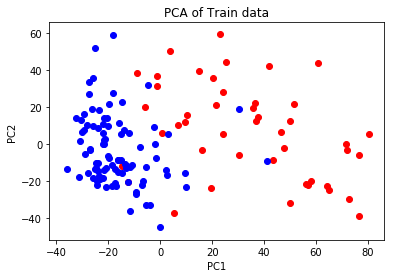

In [23]:
f = plt.figure()
plt.scatter(z_tr[y_tr == 0, 0], z_tr[y_tr == 0, 1], color="r")
plt.scatter(z_tr[y_tr == 1, 0], z_tr[y_tr == 1, 1], color="b")
plt.title("PCA of Train data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
f.savefig("PCA_train.pdf")

In a PCA plot, it is usually more informative to print also the explained variances (e.g., in the axis labels):

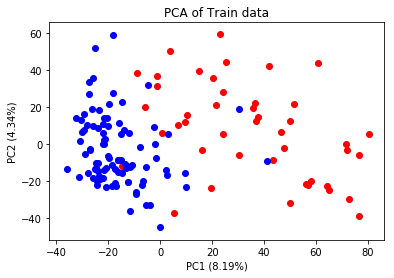

In [24]:
vars = pca.explained_variance_ratio_
f = plt.figure()
plt.scatter(z_tr[y_tr == 0, 0], z_tr[y_tr == 0, 1], color="r")
plt.scatter(z_tr[y_tr == 1, 0], z_tr[y_tr == 1, 1], color="b")
plt.title("PCA of Train data")
plt.xlabel("PC1 (%.2f%%)" % (100*vars[0]))
plt.ylabel("PC2 (%.2f%%)" % (100*vars[1]))
plt.show()
f.savefig("PCA_train_variance.pdf")

_Now apply the transformation to the test data, plot it, and save it as PDF._

In [25]:
## exercise here

# Supervised Learning

## k-NN classifier

Based on the PCA we built on our data, we decide to try some supervised learning on them.

Scikit-learn provides you access to several models via a very convenient _fit_ and _predict_ interface.

For example, let's fit a **k-NN** model on the whole training data and then use it to predict the labels of the test data.

In [26]:
knn = neighbors.KNeighborsClassifier(n_neighbors=10)

In [27]:
knn.fit(x_tr, y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [28]:
y_pred_knn = knn.predict(x_ts) # predict labels on test data

_In general, a classifier has **parameters** that need to be tuned. Default choices are not good in all situations._

_For example, in k-NN the main parameter is the **number of neighbors** used in the nearest neighbors algorithm._

_More on this in the next lecture!_

To evaluate the predictions we need some kind of metrics. 

Exercise: extract confusion matrix and try calculate metrics by hand.

### Recap: confusion matrix

In this example, the first row is class 0, so the confusion matrix will look like:

|      |  |  Predicted  |    |
|------|-----------|----|----|
|      |           | 0 | 1  |
| True | 0        | TN | FP |
|      | 1         | FN | TP |


In [29]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_ts, y_pred_knn)
conf

array([[27, 19],
       [ 0, 90]])

The total number of class 0 test samples (AN = All Negatives) should be equal to the sum of the first row of the confusion matrix, i.e., TN + FP:

In [30]:
np.sum(y_ts==0) # total number of "class 0" samples in the test set

46

Similarly for class 1, i.e., AP = All Positives = TP + FN:

In [31]:
np.sum(y_ts==1) # total number of "class 1" samples in the test set

90

Compute the Accuracy, remembering/using the formula: 

ACC = (TN + TP) / (TN + TP + FN + FP)

TN and TP are on the main diagonal of our conf Numpy array. The denominator is equivalent to the overall sample size.

In [32]:
(conf[0,0] + conf[1,1])/y_ts.shape[0] # y_ts.shape[0] is the sample size of the test set

0.8602941176470589

**Hint** : For clearer coding, you may want to assign variables to the elements of the confusion matrix. Here is an idea:

In [33]:
tp = conf[1,1]
tn = conf[0,0]
fp = conf[0,1]
fn = conf[1,0]

acc = (tn + tp) / (tn + tp + fn + fp)
print(acc)

0.8602941176470589


Now compute the Sensitivity.

Remember the formula:

SENS = TP / (TP + FN)

In [34]:
conf[1,1] / (conf[1,1] + conf[1,0])

1.0

Computing metrics by hand is good, but what about a quicker option?

As seen in the lectures, Scikit Learn offers a handy broad range of functions to evaluate your classifier through its submodule `metrics`.

Let's compute the accuracy using the scikit-learn built-in function `accuracy_score`, taking as input the predicted labels (`y_pred_knn`) and the true labels (`y_ts`):

`accuracy_score(y_pred_knn, y_ts)`

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_ts, y_pred_knn)

0.8602941176470589

What about Sensitivity? The built-in function is called `recall_score`, as Recall is an alternate name for Sensitivity. Again, its input are the predicted and the true labels.


In [36]:
from sklearn.metrics import recall_score
recall_score(y_ts, y_pred_knn)

1.0

Hint: if you plan to use more than a function from the `metrics` submodule, you may want to import the entire submodule. Then you would access its functions by prepending `metrics.` to the function name, like this:

In [37]:
from sklearn import metrics
print(metrics.accuracy_score(y_ts, y_pred_knn))
print(metrics.recall_score(y_ts, y_pred_knn))

0.8602941176470589
1.0


Scikit-learn also provides a neat `metrics.classification_report` function that outputs a few metrics stratified by class:

In [38]:
from sklearn import metrics
print(metrics.classification_report(y_ts, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74        46
           1       0.83      1.00      0.90        90

   micro avg       0.86      0.86      0.86       136
   macro avg       0.91      0.79      0.82       136
weighted avg       0.88      0.86      0.85       136



Let's consider the Matthews Correlation Coefficient (MCC):

![MCC formula](https://www.researchgate.net/profile/Pablo_Moscato/publication/223966631/figure/fig1/AS:305103086080001@1449753652505/Calculation-of-Matthews-Correlation-Coefficient-MCC-A-Contingency-matrix_W640.jpg)

*Q: Do you remember the main features of MCC?*

In scikit-learn it is computed by the `metrics.matthews_corrcoef` function.

If we get the MCC for our kNN predictions, we can observe that it is in line with our *a priori* knowledge of the dataset (from the article):

In [39]:
print(metrics.matthews_corrcoef(y_ts, y_pred_knn))

0.6961630553262051


*Compare the metrics that you computed so far. What can you say about this classification task? Does the classifier learn something?*

The metrics may look good (e.g., accuracy around 0.8, MCC above 0.6) but...

... how do you know if this model performs similarly well on unseen data?

In other words, does this model *generalize* beyond its training set?

This is why *data partitioning* techniques are used.

## Data partitioning

### Hold-out strategy

The idea behind data partitioning is to split your original data set into a **train** portion (for developing your machine learning model) and a **test** portion (for evaluating the performance of the trained model).

The simplest and most straightforward way to partition your data set is to randomly split it in two groups (*hold-out strategy*).


---


"But we already have a dataset split into train and test!", you may object.

Well, the data was previously split into balanced train and test sets of 136 samples each. This is somewhat different from the 80/20 train/test split we mentioned in the lecture. In fact, this specific data split was created ad-hoc during the article preparation to ensure balance in the various clinical characteristics of the neuroblastoma samples represented (e.g. MYCN amplification status, INSS tumor staging, … Full details are reported in the article).

For the sake of this tutorial, we will further split the neuroblastoma train set into two subsets.


---


You achieve this using scikit-learn's function `train_test_split`, in the `model_selection` submodule.

For example, let's split the data (x_tr) into 80% train and 20% test (note the argument `test_size=0.2`)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_tr, y_tr, test_size=0.2, random_state=1)



---

What is the random_state?

Whenever randomness is involved in a computer program, we need to rely on some sort of workaround because computers follow their instructions blindly and they are therefore completely predictable.

One approach relies on *Pseudo-Random Number Generators* (PRNGs). 

PNRGs are algorithms that use mathematical formulas or precalculated tables to produce sequences of numbers that appear random. 

PNRGs are initialized by a *seed* (an integer), so that *the same seed yields the same sequence of pseudo-random numbers*. This is useful for reproduciblity.


---



*Now, retrain a kNN model on X_train and evaluate its performance on X_test. Try using different random states for data splitting.*

In [41]:
from sklearn import metrics
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred_knn)
mcc = metrics.matthews_corrcoef(y_test, y_pred_knn)

print(f"Accuracy = {acc:.3f}")
print(f"MCC = {mcc:.3f}")

Accuracy = 0.750
MCC = 0.538


### Cross-validation

Partitioning the dataset once in training/test is not enough. As you may have seen, the results are fairly dependent on the random seed that was used in the splitting function.

Other strategies involve splitting the data in **multiple (complementary) subsets**.

During the lecture we introduced the k-fold cross-validation:

![k-fold cv](https://www.researchgate.net/profile/B_Aksasse/publication/326866871/figure/fig2/AS:669601385947145@1536656819574/K-fold-cross-validation-In-addition-we-outline-an-overview-of-the-different-metrics-used_W640.jpg)

Example of a 5-fold cross-validation (CV) with scikit-learn:

In [42]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

A "stratified" 5-fold CV means that the folds are made by preserving the percentage of samples for each class.

To actually get the splitting indices and create the folds, we need to iterate over the `skf` object:

In [43]:
## get the number of splitting operations
N = skf.get_n_splits(x_tr, y_tr)

## reinitialize a kNN classifier
knn = neighbors.KNeighborsClassifier(n_neighbors=10)

## create empty lists to store the CV metrics
acc_list = []
mcc_list = []

## split data and iterate over the splits,
## computing kNN accuracy & MCC on each test partition
i = 1
for (idx_tr, idx_ts) in skf.split(x_tr, y_tr):
    print(f"### Fold {i+1} / {N:d} ###")
    X_train, Y_train = x_tr[idx_tr], y_tr[idx_tr]
    X_test, Y_test = x_tr[idx_ts], y_tr[idx_ts]
    print("TRAIN size:", X_train.shape[0])
    print("-- class 0:", np.sum(Y_train==0), "class 1:", np.sum(Y_train==1))
    print("TEST size:", X_test.shape[0])
    print("-- class 0:", np.sum(Y_test==0), "class 1:", np.sum(Y_test==1))
    print()
    print("Model performance")
    knn.fit(X_train, Y_train)
    Y_test_pred = knn.predict(X_test)
    acc = metrics.accuracy_score(Y_test, Y_test_pred)
    mcc = metrics.matthews_corrcoef(Y_test, Y_test_pred)
    print(f"Accuracy on TEST set: {acc:.3f}")
    print(f"MCC on TEST set: {mcc:.3f}")
    print()
    ## append values to lists
    acc_list.append(acc)
    mcc_list.append(mcc)
    
    i = i + 1

### Fold 2 / 5 ###
TRAIN size: 108
-- class 0: 36 class 1: 72
TEST size: 28
-- class 0: 9 class 1: 19

Model performance
Accuracy on TEST set: 0.929
MCC on TEST set: 0.839

### Fold 3 / 5 ###
TRAIN size: 109
-- class 0: 36 class 1: 73
TEST size: 27
-- class 0: 9 class 1: 18

Model performance
Accuracy on TEST set: 0.852
MCC on TEST set: 0.674

### Fold 4 / 5 ###
TRAIN size: 109
-- class 0: 36 class 1: 73
TEST size: 27
-- class 0: 9 class 1: 18

Model performance
Accuracy on TEST set: 0.815
MCC on TEST set: 0.567

### Fold 5 / 5 ###
TRAIN size: 109
-- class 0: 36 class 1: 73
TEST size: 27
-- class 0: 9 class 1: 18

Model performance
Accuracy on TEST set: 0.815
MCC on TEST set: 0.590

### Fold 6 / 5 ###
TRAIN size: 109
-- class 0: 36 class 1: 73
TEST size: 27
-- class 0: 9 class 1: 18

Model performance
Accuracy on TEST set: 0.926
MCC on TEST set: 0.837



*Q: how are the computed metrics on the different folds?*

To get an estimate of the predictive performance of our model, we can average over the cross-validation metrics.

In [44]:
## note: we need to convert the lists to numpy arrays before computing the means
acc_avg = np.mean(np.array(acc_list))
mcc_avg = np.mean(np.array(mcc_list))

print(f"Average cross-validation accuracy: {acc_avg:.3f}")
print(f"Average cross-validation MCC: {mcc_avg:.3f}")

Average cross-validation accuracy: 0.867
Average cross-validation MCC: 0.701


To have an even better estimate of how the model can generalize on new data, you can repeat the CV several times. Each time you will use a different seed for generating the splits. Let's see an example with 10 iterations:

In [45]:
## how many repetitions?
N_CV = 10

## create empty lists to store the CV metrics
acc_list = []
mcc_list = []

for i_cv in range(N_CV):
    
    print(f"### Iteration {i_cv+1} ###")
    ## create a CV object
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=i_cv)
    
    ## reinitialize a kNN classifier
    knn = neighbors.KNeighborsClassifier(n_neighbors=10)

    ## split data and iterate over the splits,
    ## computing kNN accuracy & MCC on each test partition
    for i, (idx_tr, idx_ts) in enumerate(skf.split(x_tr, y_tr)):
        X_train, Y_train = x_tr[idx_tr], y_tr[idx_tr]
        X_test, Y_test = x_tr[idx_ts], y_tr[idx_ts]
        knn.fit(X_train, Y_train)
        Y_test_pred = knn.predict(X_test)
        acc = metrics.accuracy_score(Y_test, Y_test_pred)
        mcc = metrics.matthews_corrcoef(Y_test, Y_test_pred)
        ## append values to lists
        acc_list.append(acc)
        mcc_list.append(mcc)


### Iteration 1 ###
### Iteration 2 ###
### Iteration 3 ###
### Iteration 4 ###
### Iteration 5 ###
### Iteration 6 ###
### Iteration 7 ###
### Iteration 8 ###
### Iteration 9 ###
### Iteration 10 ###


Now recompute the average values across all rounds of cross-validation:

In [47]:
## note: we need to convert the lists to numpy arrays before computing the means
acc_avg = np.mean(np.array(acc_list))
mcc_avg = np.mean(np.array(mcc_list))

print(f"Average cross-validation accuracy: {acc_avg:.3f}")
print(f"Average cross-validation MCC: {mcc_avg:.3f}")

Average cross-validation accuracy: 0.854
Average cross-validation MCC: 0.670


*Average values are informative, but you also need to compute standard deviations and/or confidence intervals in order to get a complete summary of the metrics distribution across the CV rounds.*

*For example, compute the standard deviations for the accuracies and MCCs (Numpy's `std` function).* 

What now? All of this was needed to have an estimate of the model performance, or in other terms an estimate of the generalization capability of the model.

You can now quantify your model performance in terms of average cross-validation accuracy / MCC / etc. , also with confidence intervals or standard deviations.